<a href="https://colab.research.google.com/github/MontoyaFamilia/MVPMontoya/blob/main/MVP_Final_Rodolfo_Montoya30Jun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho MVP 01
# Sprint II: Machine Learning & Analytics (40530010056_20230_01)
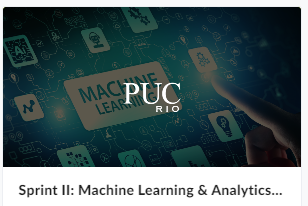

##Aluno: Rodolfo Carlos Alvarado Montoya

##Julho-23

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Introdução:
O programa foi desenvolvido utilizando programação baseado em objetos, deve ter cuidado para execução para seguir a ordem que foi desenvolvida. Foram identificadas diferentes modelos e variáveis para não ter problemas de falsa interpretação no programa.

Os documentos estão todos na pasta pública criada por mim:
https://github.com/MontoyaFamilia/MVPMontoya/

Neste repositório estão os programas e arquivos utilizados como base, os mesmos foram criados códigos para introduzir na pasta raiz.

Na pasta/repositório temos  além do arquivo base do phyton, os seguintes arquivos:


O trabalho esta funcionando, porém não deu o melhor resultado de acurácia.

Rodolfo Montoya



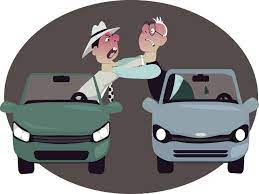
## Item 1. Treinamento de métodos clássicos para um problema de classificação ou regressão.

**Objetivo:**

Treinar o algoritmo em função de uma base de dados problema de classificação.

**Descrição do problema**

Empresas precisam de avaliar o comportamento dos motoristas das frotas, assim foram instalados sensores dentro do veículo e aquisitada as informações de acelerometria e giroscopios em cada direção.

**Restrições ou condições da seleção dos dados**

Inicialmente os dados foram adotados em função da acelerometria e de uma camera de video, onde foram classificados se o comportamento do motorista era agressivo ou não.

**Descrição do Dataset - Driving Behavior**

O DataSet foi obtido do site https://www.kaggle.com/datasets/outofskills/driving-behavior

As informações obtidas que foram colocadas como atributos foram 6: As quais seriam as medições dos sensores:

Aceleração (X,Y,Z (m/s2))

Rotation (X,Y, Z (°/s))

As informações da coluna de avaliação apos as imagens de video foram adotadas como classe:

Slow - Normal - Aggressive

In [ ]:
import warnings # Configuração para não exibir os warnings
warnings.filterwarnings("ignore")

#Importação de variaveis em geral
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # biblioteca para trabalhar com computação numéricas
import matplotlib.pyplot as plt # biblioteca para trabalhar com operações matemáticas
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

In [ ]:
# Carga do dataset da URL de importação do dataset
url = "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/test_motion_data.csv"
dataset = pd.read_csv(url, delimiter=',') # Lê o arquivo
dataset.head()#Vou mostrar somente 10 dados

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


**Preparação de dados**
Observando as quantidades de dados dentro das colunas de classificação.

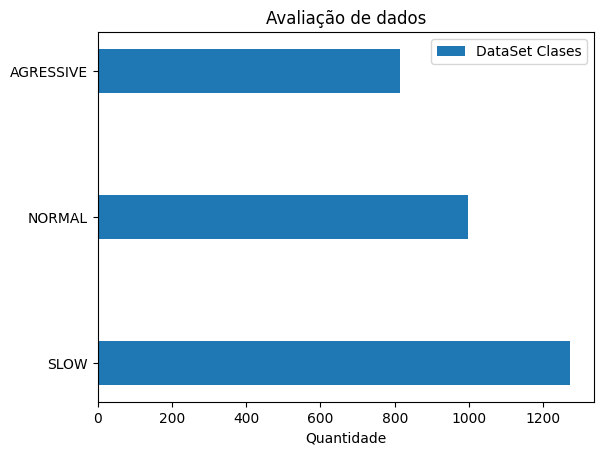

SLOW          1273
NORMAL         997
AGGRESSIVE     814
Name: Class, dtype: int64

In [ ]:
Xdesenho=['SLOW', 'NORMAL', 'AGRESSIVE']
dadosdesenho=dataset['Class'].value_counts()
width=0.3
fig, ax = plt.subplots()
ax.barh(Xdesenho, dadosdesenho, width, label ='DataSet Clases')
ax.set_xlabel('Quantidade')
ax.legend()
ax.set_title('Avaliação de dados')
plt.show()

dataset['Class'].value_counts()

Observamos que os valores na coluna classificação, boa parte dos valores são SLOW, porém as outras também estão bem distribuídas.

##Preparação de Dados Holdout
Foi separado dados em 80 e 20% para treino e teste, sendo que depois foi feita uma valiação cruzada.

K-fold é o método de cross-validation consiste em dividir o dataset em k partes, usando k-1 partes para treino e a parte remanescente para teste, fazendo isso k vezes.

Em cada uma das k vezes, testa-se o modelo com um fold diferente calculando a métrica escolhida para avaliação do modelo. Ao final do processo, teremos k medidas da métrica de avaliação escolhida, com as quais calculamos a média e o desvio-padrão.

Estamos utilizando Cross Validation para avaliação de desempenho deste modelo. Utilizando CV podemos detectar se o modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo overfitting.

In [ ]:
# Preparação dos dados
# Separação em bases de treino e teste (holdout)
test_size = 0.20 # faz a divisão estou colocando 20 % de teste e 80 % de treino
array = dataset.values
X = array[:,0:6] # atributos de 2 até 31
y = array[:,6] # classe estou definindo o que preciso classificar que seria a nota final
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
# Criando os folds para a validação cruzada
num_particoes = 5 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 5 folds

##Modelagem e treinamento:

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, o valor que foi escolhido foi em função do que tiver a maior média dos dados após o cruzamento de dados.

KNN: 0.405968 (0.007977)
CART: 0.376568 (0.013915)
NB: 0.454816 (0.025705)
SVM: 0.469523 (0.018168)
O método com maior acuracia foi: SVM com uma média de :0.46952306153170087


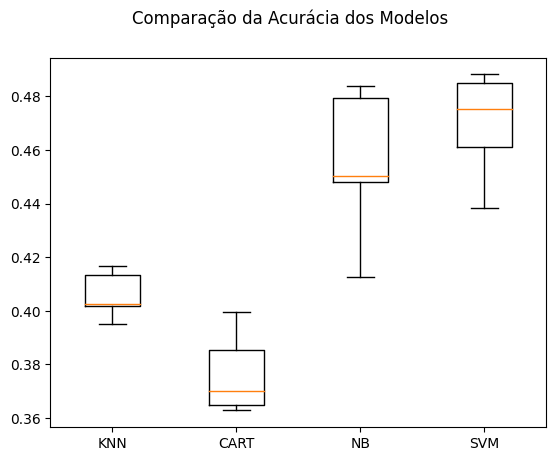

In [ ]:
# Modelagem
# Definindo uma seed global para esta célula de código
np.random.seed(7) # Coloquei 7 para estar na mesma semente que a professora
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = [] # criada uma lista zerada
results = [] # criada uma lista zerada
names = [] # criada uma lista zerada
mostrar = [] # criada uma lista zerada
media = [] # criada uma lista zerada
# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier())) #KNN
models.append(('CART', DecisionTreeClassifier())) #Arvore de decisões
models.append(('NB', GaussianNB())) # Nayves Bayer
models.append(('SVM', SVC())) #SVM

for name, model in models: # Avaliando um modelo por vez
  cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv)
  names.append(name)
  media.append(cv.mean()) # decidi escolher o que tenha a melhor media aritmetica
  msg = "%s: %f (%f)" % (name, cv.mean(), cv.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

mmedia=max(media)
print("O método com maior acuracia foi: " + names[media.index(mmedia)] + " com uma média de :" + str(mmedia))

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Criando um modelo com todo o conjunto de dados
model=models[media.index(mmedia)][1]
name=names[media.index(mmedia)]
model.fit(X_train, y_train)
# Estimando a acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
model.fit(X, y)
# Fazendo as predições com o conjunto de dados
predictions = model.predict(X)
print(accuracy_score(y, predictions))

0.4669260700389105
0.4964332036316472


Quando colocamos todos os dados para testar o resultado, obervamos que não há overfitting.

A função classification_report() disponível nas métricas do scikit-learn trás as principais métricas de performance para modelos de classificação. São mostrados 3 principais indicadores de performance, para cada classificação:
precisão, recall e o F1 score.

In [ ]:
#Visualização do relatório de classificação
print(classification_report(y,predictions))

              precision    recall  f1-score   support

  AGGRESSIVE       0.65      0.28      0.39       814
      NORMAL       0.51      0.12      0.20       997
        SLOW       0.47      0.92      0.63      1273

    accuracy                           0.50      3084
   macro avg       0.54      0.44      0.41      3084
weighted avg       0.53      0.50      0.43      3084



Observamos que a variável SLOW é a que tem a maior aderência nos resultados.

##Testando modelo com resultados reais

In [ ]:
TesteReal= []
print ("Introduza dados - AccX	AccY	AccZ	GyroX	GyroY	GyroZ ")

print("Colocar valores entre %2f e %2f" % (min(X[0]), max(X[0])))
TesteReal.append(float(input('AccX: ')))
print("Colocar valores entre %2f e %2f" % (min(X[1]), max(X[1])))
TesteReal.append(float(input('AccY: ')))
print("Colocar valores entre %2f e %2f" % (min(X[2]), max(X[2])))
TesteReal.append(float(input('AccZ: ')))
print("Colocar valores entre %2f e %2f" % (min(X[3]), max(X[3])))
TesteReal.append(float(input('GyroX: ')))
print("Colocar valores entre %2f e %2f" % (min(X[4]), max(X[4])))
TesteReal.append(float(input('GyroY: ')))
print("Colocar valores entre %2f e %2f" % (min(X[5]), max(X[5])))
TesteReal.append(float(input('GyroZ: ')))

# Criando um modelo com todo o conjunto de treino
model=models[media.index(mmedia)][1]
model.fit(X, y)
test_predic = model.predict([TesteReal])
print("O motorista tem comportamento " + str(test_predic))

Introduza dados - AccX	AccY	AccZ	GyroX	GyroY	GyroZ 
Colocar valores entre -0.217791 e 0.758194
AccX: 0.75
Colocar valores entre -0.054367 e 0.667560
AccY: 0.66
Colocar valores entre -7.584121 e 2.724449
AccZ: 2.72
Colocar valores entre -7.621754 e 2.529024
GyroX: 2.52
Colocar valores entre -6.755621 e 2.847215
GyroY: 2.85
Colocar valores entre -1.646833 e 0.442229
GyroZ: 0.44
O motorista tem comportamento ['AGGRESSIVE']


## Verificações dos modelos

Neste capitulo foram feitas operações de transformação de dados (como normalização e padronização), avaliando qual seria mais apropriado para meu problema.

In [ ]:
# SelectKBest
best_var = SelectKBest(score_func=f_classif, k=2) # Seleção de atributos com SelectKBest
escolhas = []
# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)
# Reduz X para os atributos selecionados
features = fit.transform(X)
escolhas = best_var.get_feature_names_out(input_features=dataset.columns[0:6])
print (escolhas)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:5])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:6]))

['AccX' 'AccY']

Número original de atributos: 6

Número reduzido de atributos: 2

Atributos Originais: Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY'], dtype='object')

Scores dos Atributos Originais: [11.392 31.267  0.163  1.167  1.021  1.81 ]

Atributos Selecionados: ['AccX' 'AccY']


In [ ]:
# Eliminação Recursiva de Atributos
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=3)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:6])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:6]))

Atributos Originais: Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ'], dtype='object')

Atributos Selecionados: [False False False  True  True  True]

Ranking de atributos: [3 2 4 1 1 1]

Qtd de melhores Atributos: 3

Nomes dos Atributos Selecionados: ['GyroX' 'GyroY' 'GyroZ']


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:6])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ'], dtype='object')
[0.178 0.183 0.161 0.158 0.158 0.162]


##**Feature Selection**

Iniciaremos agora a etapa de modelagem e inferência, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia.

LR: 0.455213 (0.010887)
KNN: 0.413061 (0.015778)
CART: 0.381842 (0.015603)
NB: 0.466164 (0.017344)
SVM: 0.465346 (0.004293)
Bagging: 0.432917 (0.022058)
RF: 0.436167 (0.021856)
ET: 0.447111 (0.014802)
Ada: 0.447518 (0.014900)
GB: 0.453595 (0.013655)
Voting: 0.464540 (0.011602)


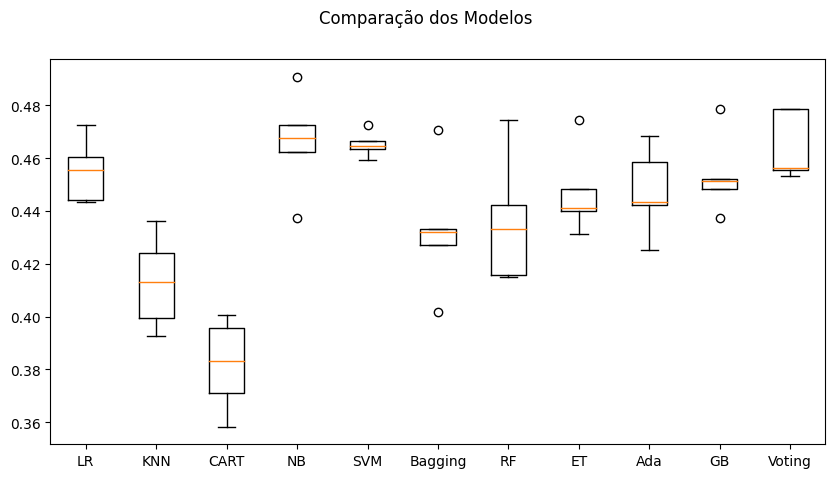

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória
# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

np.random.seed(7) # definindo uma semente global
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Features selection**
Utilizaremos a função pipeline para padronizar e normalizar os dados

LR-orig: 0.455 (0.011)
KNN-orig: 0.413 (0.016)
CART-orig: 0.382 (0.016)
NB-orig: 0.466 (0.017)
SVM-orig: 0.465 (0.004)
Bag-orig: 0.433 (0.022)
RF-orig: 0.436 (0.022)
ET-orig: 0.447 (0.015)
Ada-orig: 0.448 (0.015)
GB-orig: 0.454 (0.014)
Vot-orig: 0.465 (0.012)
LR-padr: 0.456 (0.010)
KNN-padr: 0.404 (0.019)
CART-padr: 0.381 (0.014)
NB-padr: 0.466 (0.017)
SVM-padr: 0.466 (0.016)
Bag-padr: 0.436 (0.016)
RF-padr: 0.434 (0.021)
ET-padr: 0.435 (0.016)
Ada-padr: 0.447 (0.015)
GB-padr: 0.454 (0.014)
Vot-padr: 0.464 (0.013)
LR-norm: 0.450 (0.012)
KNN-norm: 0.408 (0.028)
CART-norm: 0.384 (0.016)
NB-norm: 0.466 (0.017)
SVM-norm: 0.479 (0.006)
Bag-norm: 0.430 (0.016)
RF-norm: 0.437 (0.018)
ET-norm: 0.437 (0.014)
Ada-norm: 0.447 (0.015)
GB-norm: 0.455 (0.014)
Vot-norm: 0.467 (0.008)


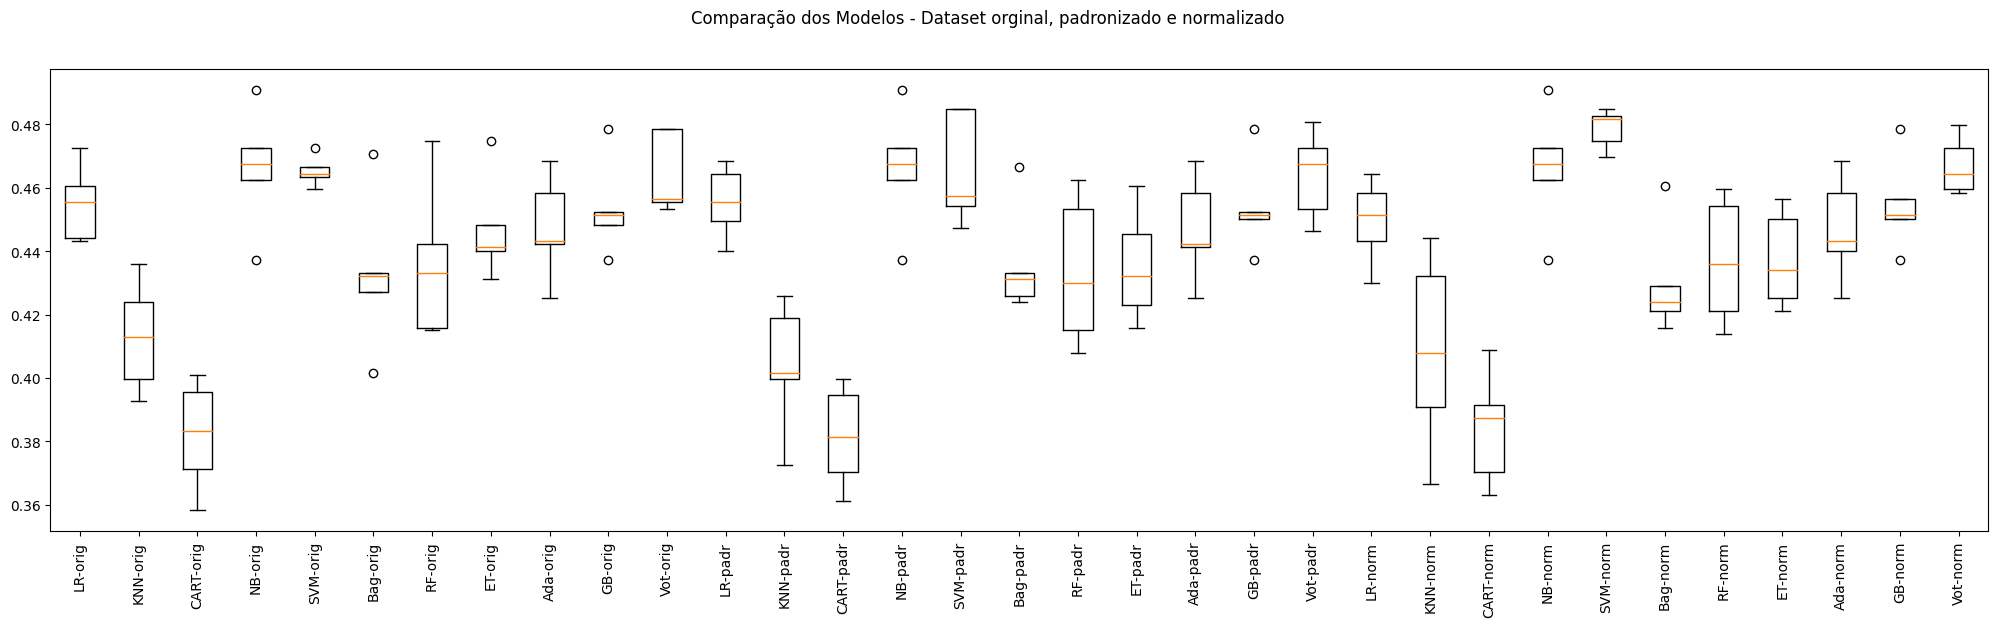

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco
# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []
# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv.mean(), cv.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##**Avaliação dos Hyperparmeters**
Foi escolhido como o melhor modelo o Nayves e SVM e assim avaliado os parâmetros dele e realizado um grid search

{'var_smoothing': 0.2848035868435802}
0.4489247311827958
accuracy_score on test dataset :  0.4554294975688817


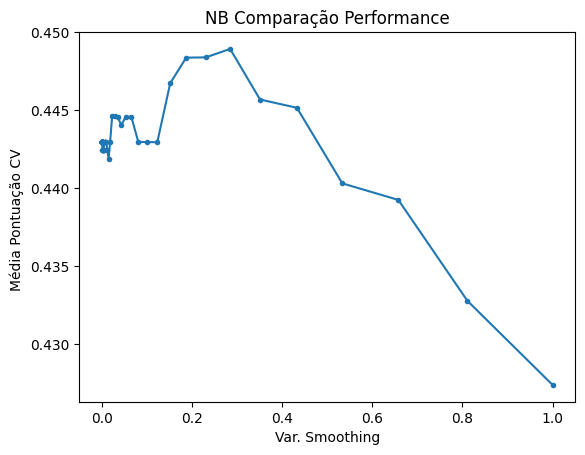

In [ ]:
#Hyperparameter Tuning Nayves escolhido por ter o melhor indice de media das análises anteriores
model=GaussianNB()
np.logspace(0,-9, num=10)
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}#parametros do Nayves em dicionarios

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method, verbose=0, scoring='accuracy') #Formatando o Grid Search
Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)
mparametros=gs_NB.best_params_
mresultados=gs_NB.best_score_

predict_test = gs_NB.predict(Data_transformed) # predict the target on the test dataset
accuracy_test = accuracy_score(y_test,predict_test) # Accuracy Score on test dataset

print(mparametros)
print(mresultados)
print('accuracy_score on test dataset : ', accuracy_test)

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Média Pontuação CV ")
plt.title("NB Comparação Performance")
plt.show()

In [ ]:
#Hyperparameter Tuning SVM escolhido por ter o melhor indice de media das análises anteriores
param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)# Coloquei Verbose=1 para não aparecer todas as contas
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC(C=1, gamma=0.1)


In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

0.4343598055105348


LogisticRegression(max_iter=200)

Finalmente vamos avaliar todo o conjunto de dados com um percentual de treino e com os melhores parâmetros encontrados


In [ ]:
#avaliação para varias situações para poder avaliar a importancia de cada atributo, para isto foi criado uma função para alterar os dados quando necessários
def modelagem(X):
  y = array[:,6] # classe estou definindo o que preciso classificar que seria a nota final
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
  # Criando os folds para a validação cruzada
  num_particoes = 15 # número de folds da validação cruzada
  kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 15 folds o que foi obtido dos valores do pipeline
  model=SVC(C=1.0, kernel='rbf', degree=3, gamma=0.1)
  # Criando um modelo com todo o conjunto de dados
  model.fit(X, y)
  # Fazendo as predições com o conjunto de dados
  predictions = model.predict(X)
  print(accuracy_score(y, predictions)*100)

# Modelagem
test_size = 0.20 # faz a divisão estou colocando 20 %
array = dataset.values
modelagem(array[:,0:5]) #todos os atributos
modelagem(array[:,3:5]) #Somente giroscopios
modelagem(array[:,0:2]) #Somente acelerometria

48.47600518806745
41.27756160830091
47.47081712062256


Observamos que os 6 atributos são importantes, porém podemos optar para não utilizar os valores do giroscópio tendo uma perda de acurácia de 1%.

##**Conclusões***

* É possível reduzir as informações de aquisição de dados para somente Aceleração, assim sendo mais rápida nossa aquisição, fizermos as comparações e os resultados são similares tendo uma perda de acurácia de 1%;
* Segundo os valores do relatorio de classificação não houve overfitting e foi válida a utilização de avaliação cruzada de dados;
* As metodologias de parametrização não melhoraram os resultados para este tipo de informação;
* Obtivemos melhores resultados quando foi utilizado e melhorado com pipeline no modelo Nayves e SVM;
* O melhor modelo seria o normalizado do SVM, alcançou a melhor acurácia e menor desvio padrão, quando feita avaliação de hiperparâmetros observou-se que no SVM foram encontrados parâmetros otimizados;
* Utilizamos recursos de melhoria dos modelos, porém após avaliação dos resultados, não houve muita melhoria, concluímos que não seria de grande ajuda neste problema;
* Interessante melhoria dos dados com um bom pré processamento;
* Finalmente nosso índice de resultados foi proximo do 48%, não sendo um bom resultado do ponto de vista de acurácia.

##**Check list**

Objetivo: Feito.

Descrição do problema? - Feito.

Preparação de Dados (validação, padronização, fetures selection)- Feito.

Modelagem e treinamento (escolha do modelo, hiperparâmetros, ensembles) - Feito.

Avaliação de Resultados:- Resultados, comparação dos modelos e método fazem sentido - Feito.

Foi observado algum problema de overfitting - Feito.

Descreva a melhor solução encontrada - Feito.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

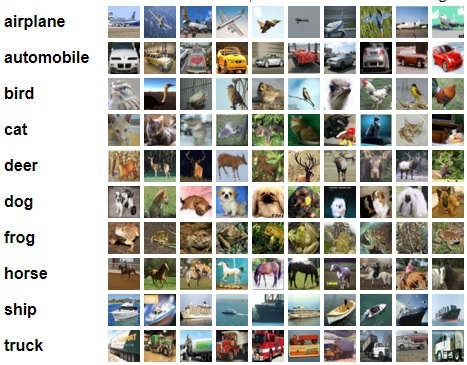
## Item 2. Treinamento de Deep Learning para um problema de visão computacional ou processamento de linguagem natural

**Objetivo:**

Treinar o algoritmo utilizando deep learning, com a base de dados CIfar10, para classificar figuras com um aprendizado supervisionado.

**Descrição do problema**

É necessário validar imagens e classificar elas automaticamente, para saber o conteúdo que esta sendo observado. Para isto foi utilizado deep Learning e tratamento de imagens.

**Restrições ou condições da seleção dos dados**

Inicialmente os dados foram obtidos do dataset Cifar10.

**Descrição do Dataset - Cifar10**

O DataSet foi obtido do site https://www.cs.toronto.edu/~kriz/cifar.html

O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas 32x32 em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

O conjunto de dados é dividido em cinco lotes de treinamento e um lote de teste, cada um com 10.000 imagens. O lote de teste contém exatamente 1.000 imagens selecionadas aleatoriamente de cada classe. Os lotes de treinamento contêm as imagens restantes em ordem aleatória, mas alguns lotes de treinamento podem conter mais imagens de uma classe do que de outra. Entre eles, os lotes de treinamento contêm exatamente 5.000 imagens de cada classe.

Aqui estão as classes no conjunto de dados, bem como 10 imagens aleatórias de cada uma:

airplane - automobile - bird - cat - deer - dog - frog - horse -
ship - truck

In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Input, Conv2D, Dropout
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from skimage.io import imread
from sklearn.model_selection import GridSearchCV
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from PIL import Image
import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras # redes neurais
from keras.models import Model # Autoencoder model
from keras import Input # keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # camadas model
from tensorflow.keras.utils import plot_model # desenho
import numpy as np # manipulação de dados
import matplotlib
import matplotlib.pyplot as plt # plotar
import graphviz # plotar
import sys
import os

##Carregando os dados
O carregamento é automático do programa keras, onde já temos a base de dados armazenada, somente carregar os dados com os comandos que são disponibilizados na documentação do keras.

In [ ]:
# Carregando os valores do CIFAR10
cifar10= tf.keras.datasets.cifar10
# Distribuição de treino
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
width = x_train.shape[1]
height = x_train.shape[2]

170498071/170498071 [==============================] - 2s 0us/step


Faço uma verificação visual do tamanho da imagem e RGB

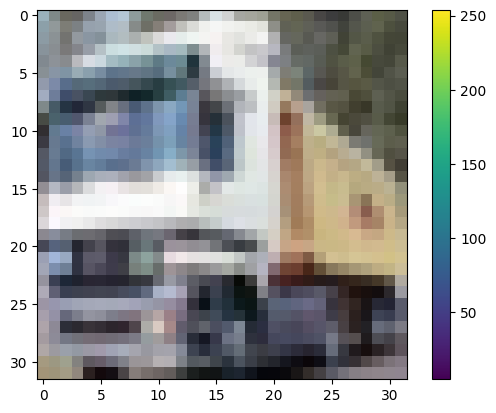

In [ ]:
# Verificando a qualidade das imagens
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Necessário reduzir as matrizes para padronizar

In [ ]:
# Reduzindo a quantidade de pixels
x_train, x_test = x_train / 255.0, x_test / 255.0
# comprimindo os valores
y_train, y_test = y_train.flatten(), y_test.flatten()
nome_classes = ['Avião', 'Carro' ,'Pássaro' ,'Gato' ,'Cervo' , 'Cachorro' ,'Sapo' ,'Cavalo' , 'Barco', 'Caminhão']

## Tratamento de dados

Criei uma função para visualizar todas as imagens quando necessário.

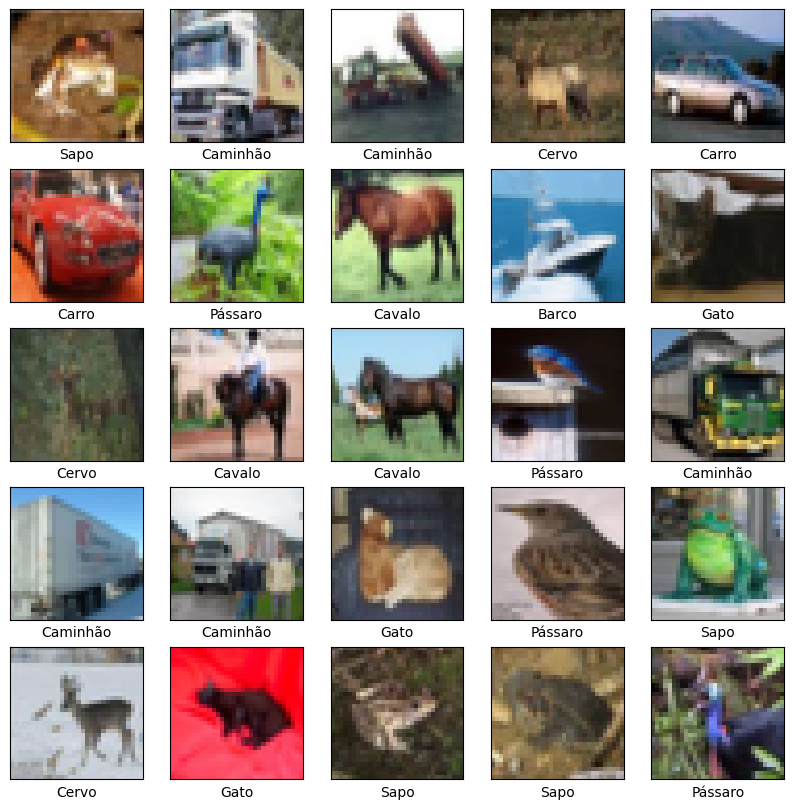

In [ ]:
def visualiza (images,labels): # Criando uma função para visualizar o dataset
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(nome_classes[labels[i][0]])
  plt.show()
visualiza(train_images,train_labels)

##Criação do modelo para Deep Learning

O modelo de treino é criado com varias camadas ocultas, aumentando sempre a quantidade de neurónios para cada camada de aprendizado, os resultados foram bons.

In [ ]:
# Criando o modelo com camadas variaveis ocultas - calibrado com a melhor quantidade de neuronios - Modelo 0
K = len(set(y_train)) # numero de classes
num = 2
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
while num < 4:
  x = Conv2D(32*num, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32*num, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  num+=1

x = Flatten()(x) # Comprimindo a lista para 1D
x = Dropout(0.2)(x) #zerando aleatoriamente uma camada de neuronios

x = Dense(units=width * height, activation='relu')(x)
x = Dropout(0.2)(x) #zerando aleatoriamente uma camada de neuronios oculta

x = Dense(K, activation='softmax')(x) # ultima camada de saída
model0 = Model(i, x) # Modelo final que será utilizado
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

## Treinamento do Modelo

O modelo é treinado, e utilizamos já os optimizadores mais comuns e de melhor performance, assim como um batch para poder barrer em certa maneira as informações, muito similar ao grid search.

In [ ]:
#Treinando o modelo 0
#Compilando modelo
model0.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Iter=20
r1 = model0.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=Iter)

Epoch 1/20
1563/1563 [==============================] - 20s 9ms/step - loss: 1.2702 - accuracy: 0.5618 - val_loss: 0.9867 - val_accuracy: 0.6661
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8358 - accuracy: 0.7124 - val_loss: 0.8058 - val_accuracy: 0.7223
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6960 - accuracy: 0.7596 - val_loss: 0.7363 - val_accuracy: 0.7512
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5981 - accuracy: 0.7920 - val_loss: 0.6806 - val_accuracy: 0.7716
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5016 - accuracy: 0.8269 - val_loss: 0.7105 - val_accuracy: 0.7623
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4371 - accuracy: 0.8496 - val_loss: 0.6532 - val_accuracy: 0.7804
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3748 - accuracy: 0.8696 - val_loss: 0.6208 - val_ac

O modelo estaria bom!

Melhorando o modelo

In [9]:
#Treinando o modelo e gerando um trem com o batch_size tipo Grid Search
model0.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
Iter=30
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r0 = model0.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=Iter)

Epoch 1/30
1562/1562 [==============================] - 312s 197ms/step - loss: 1.4520 - accuracy: 0.4923 - val_loss: 1.0232 - val_accuracy: 0.6429
Epoch 2/30
1562/1562 [==============================] - 299s 191ms/step - loss: 1.0057 - accuracy: 0.6461 - val_loss: 0.8730 - val_accuracy: 0.6988
Epoch 3/30
1562/1562 [==============================] - 307s 196ms/step - loss: 0.8600 - accuracy: 0.7014 - val_loss: 0.8650 - val_accuracy: 0.6992
Epoch 4/30
1562/1562 [==============================] - 303s 194ms/step - loss: 0.7653 - accuracy: 0.7359 - val_loss: 0.7763 - val_accuracy: 0.7424
Epoch 5/30
1562/1562 [==============================] - 297s 190ms/step - loss: 0.6995 - accuracy: 0.7615 - val_loss: 0.7993 - val_accuracy: 0.7345
Epoch 6/30
1562/1562 [==============================] - 296s 189ms/step - loss: 0.6510 - accuracy: 0.7763 - val_loss: 0.6878 - val_accuracy: 0.7738
Epoch 7/30
1562/1562 [==============================] - 307s 197ms/step - loss: 0.6066 - accuracy: 0.7912 - val_

91%

#Análise dos resultados

Um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim. Podemos entender que em nosso modelo não esta acontencendo isto, pois as acuracias são similares.

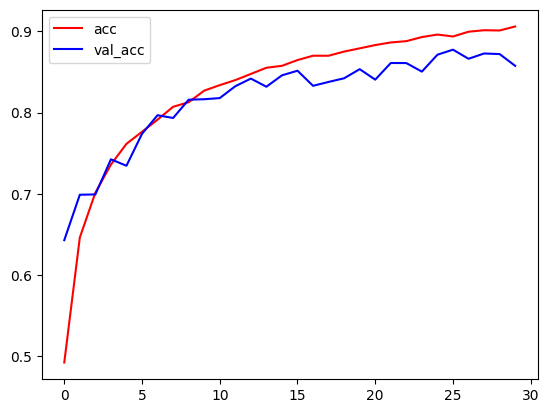

In [10]:
# Desenho acurácia - para cada iteração
plt.plot(r0.history['accuracy'], label='acc', color='red')
plt.plot(r0.history['val_accuracy'], label='val_acc', color='blue')
plt.legend()

##Testando o modelo treinado com fotos da internet

Foram obtidos figuas de alta qualidade para validar o modelo, porém existe dificuldade por terem diferentes resoluções.

In [ ]:
## Baixando as fotos do teste
!wget -O 'teste0.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Avião.jpg"
!wget -O 'teste1.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Carro.jpg"
!wget -O 'teste2.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Pássaro.jpg"
!wget -O 'teste3.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Gato.jpg"
!wget -O 'teste4.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Cervo.jpg"
!wget -O 'teste5.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Cachorro.jpg"
!wget -O 'teste6.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Sapo.jpg"
!wget -O 'teste7.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Cavalo.jpg"
!wget -O 'teste8.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Barco.jpg"
!wget -O 'teste9.jpg' "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Caminhão.jpg"

--2023-06-15 11:03:33--  https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Avi%C3%A3o.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10347 (10K) [image/jpeg]
Saving to: ‘teste0.jpg’

teste0.jpg          100%[===================>]  10.10K  --.-KB/s    in 0s      

2023-06-15 11:03:33 (103 MB/s) - ‘teste0.jpg’ saved [10347/10347]

--2023-06-15 11:03:33--  https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/Carro.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13450 (13K) [image/jpeg]
Saving to: ‘

##Predição dos modelos treinados

Com as fotos baixadas no colab, pergunto a meu modelo que tipo de foto é? e ele responde assertivamente, sendo que temos um problema na resolução das fotos de exemplo são de alta resolução, ai o programa deveria ter mais tempo para treinar.

1/1 [==============================] - 0s 81ms/step


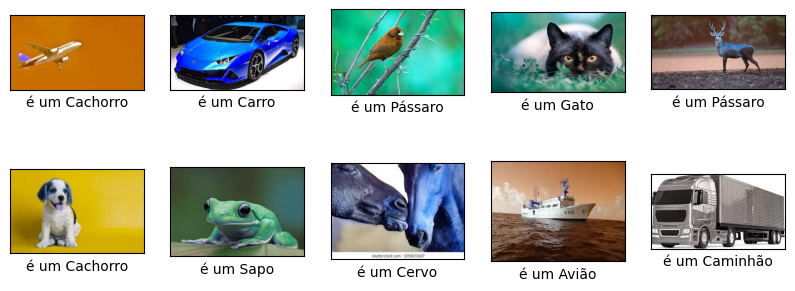

In [ ]:
Teste=['teste0.jpg','teste1.jpg','teste2.jpg','teste3.jpg','teste4.jpg','teste5.jpg','teste6.jpg','teste7.jpg','teste8.jpg','teste9.jpg']
num = len(Teste)
labels = '''Avião Carro Pássaro Gato Cervo Cachorro Sapo Cavalo Barco Caminhão'''.split()
i=0
plt.figure(figsize=(10,10))
for i in range(num):
  imagem = cv2.resize(cv2.imread(Teste[i]), (32, 32), interpolation = cv2.INTER_NEAREST)/255
  # imagem teste externa
  n = np.array(imagem)
  p = n.reshape(1, 32, 32, 3) #reorganização da matriz da foto
  predicted_label = labels[model0.predict(p).argmax()] #modelo para etiquetar na clase
  #Mostrando o resultado

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.imread(Teste[i]))
  plt.xlabel("é um {}".format(predicted_label))
plt.show()

Foi até bom, porém algumas ele errou! Errou = 4 e acertou 6. 60%

##Aplicando um denoising para melhorar as informações de entrada

A intenção é aplicar um erro nas imagens que faça que eu programa memorize muito melhor as imagens.

## Carregando os dados para denoising

Coloquei isto somente para visualizar as imagens.

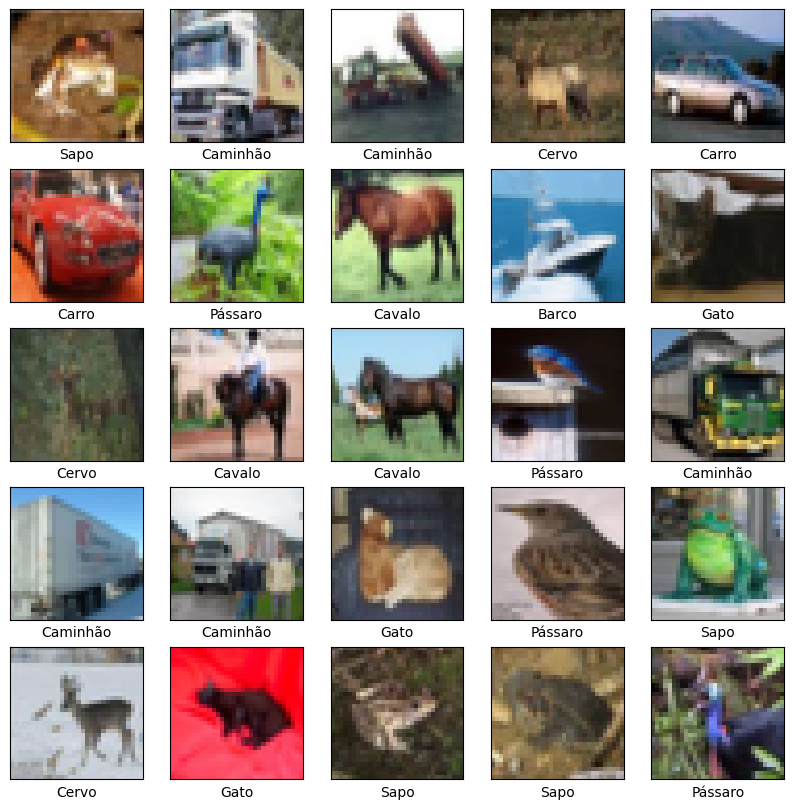

In [ ]:
#Para visualizar no exemplo e comparar com as fotos com estática
visualiza(train_images,train_labels)

## Redução de pixeis e colocação de uma sujeira na figura

NOvamente reduzi os pixeis e apliquei uma estática na base de dados.

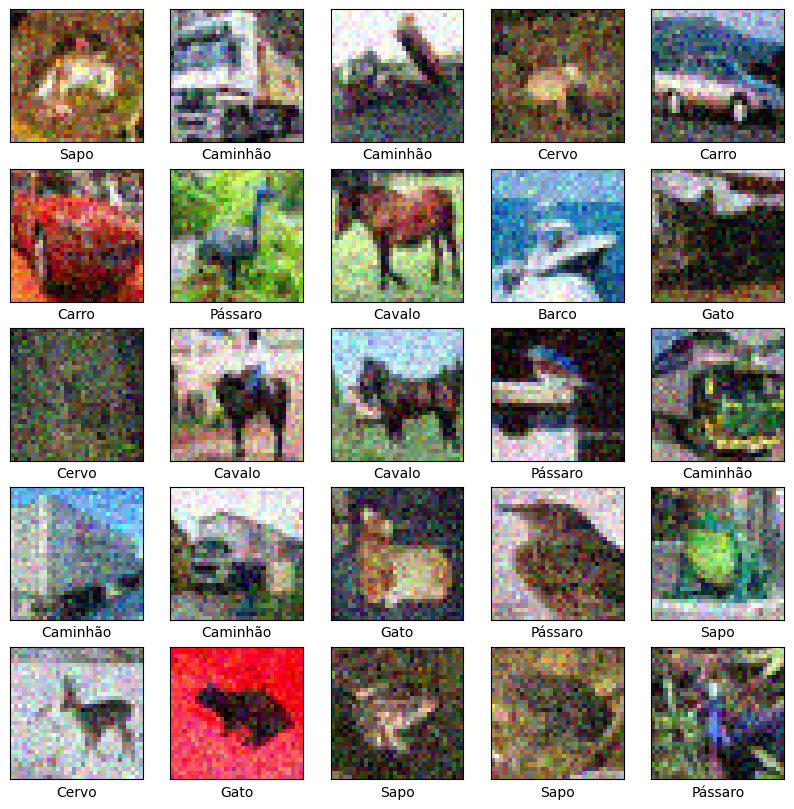

In [ ]:
# Carregando os valores do CIFAR10
cifar10= tf.keras.datasets.cifar10
# Distribuição de treino
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
width = x_train.shape[1]
height = x_train.shape[2]

# Redução de pixel
x_train, x_test = train_images/255, x_test/255
# flatten nos valores
y_train, y_test = y_train.flatten(), y_test.flatten()

# Especificando o ruído
level_of_noise=0.1

# Somando à matriz existente
x_train_noisy = x_train + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Colocando dentro de [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

visualiza(x_train_noisy,train_labels)

## Modelando o denoising ou seja Encoder e Decoder

Aqui foi modelado o denoising, com técnicas profundas de encoder e deconder. Fizemos dois modelos um como ensinado e outro editado o mesmo mais enxuto.

In [ ]:
#Enconder editado por Rodolfo Montoya, baseado no exposto nas aulas PUC Model 01
K = len(set(y_train)) # numero de classes
i = Input(shape=x_train_noisy[1].shape) #Especifico a primeira camada

#Camada Encoder
e = Conv2D(32, (3, 3), padding='same')(i)
e = LeakyReLU()(e)
e = BatchNormalization()(e)
num=0
while num < 2:
  if num ==0:
    e = Conv2D(64, (3, 3), padding='same')(e)
    e = LeakyReLU()(e)
  elif num ==1:
    e = Conv2D(128, (3, 3), padding='same')(e)
    e = LeakyReLU()(e)
  num+=1

#Camada Intermediaria
m = Flatten()(e)
m = Dense(units=width * height,activation='sigmoid')(m)
m = Dropout(0.2)(m) #zerando aleatoriamente uma camada de neuronios oculta
j = tf.reshape(m, (-1, width, height, 1))

#Camada Decoder
d = Conv2DTranspose(128,(3, 3), padding='same')(j)
d = LeakyReLU()(d)
num=0
while num < 2:
  if num==0:
    d = Conv2DTranspose(64, (3, 3), padding='same')(d)
    d = LeakyReLU()(d)
  elif num==1:
    d = Conv2DTranspose(32, (3, 3), padding='same')(d)
    d = LeakyReLU()(d)
  num+=1
d = Flatten()(d) # Comprimindo a lista para 1D
d = Dropout(0.2)(d) #zerando aleatoriamente uma camada de neuronios

#Camada de saída
s = Dense(units=width * height)(d)
s = LeakyReLU()(d)
s = Dropout(0.2)(s) #zerando aleatoriamente uma camada de neuronios oculta
s = Dense(K, activation='softmax')(s) # ultima camada de saída

#Modelo final
model1 = Model(i, s) # Modelo final que será utilizado
print(model1.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                           

Treinando o modelo com estática

Treinamos o modelo. Adaptei o codigo da PUC para treinar o modelo.

In [ ]:
#Treinando o modelo 01
#Compilando modelo
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Iter=20
r1 = model1.fit(x_train_noisy, y_train, validation_data=(x_test_noisy, y_test), epochs=Iter)

Epoch 1/20
1563/1563 [==============================] - 74s 42ms/step - loss: 2.0787 - accuracy: 0.2400 - val_loss: 1.9824 - val_accuracy: 0.2974
Epoch 2/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.9859 - accuracy: 0.2894 - val_loss: 1.9570 - val_accuracy: 0.3072
Epoch 3/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9845 - accuracy: 0.2886 - val_loss: 1.9660 - val_accuracy: 0.3186
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9869 - accuracy: 0.2921 - val_loss: 1.9386 - val_accuracy: 0.3195
Epoch 5/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.9847 - accuracy: 0.2903 - val_loss: 2.0071 - val_accuracy: 0.2943
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.9851 - accuracy: 0.2887 - val_loss: 1.9182 - val_accuracy: 0.3201
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9615 - accuracy: 0.2973 - val_loss: 1.9770 -

Resultados foram relativamente baixos!

Fiz novamente outro modelo de encoder simplificado com uma reformulação das matrizes das figuras.

In [ ]:
#Encoder enxuto para gerar imagens tem que estar com formato reformulado da matriz Modelo02

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

x_train_noisy = x_train_noisy.reshape(50000, 3072)
x_test_noisy = x_test_noisy.reshape(10000, 3072)

n_inputs=x_train.shape[1] # entrada o número de informações e número de neurónios

#Camada de entrada
i = Input(shape=(n_inputs,)) # Entrada

#Camada de Encoder
e = Dense(units=n_inputs)(i)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#Camada Média
m = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001))(e)

#Camada Decoder
d = Dense(units=n_inputs)(m)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

#Camada de Saída
s = Dense(units=n_inputs, activation='softmax')(d)

#Modelo Autoencoder
model2 = Model(i,s)

#Imprimir o modelo
print(model2.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 3072)              9440256   
                                                                 
 batch_normalization_8 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 3072)              9440256   
                                                                 
 dense_10 (Dense)            (None, 3072)              9440256   
                                                           

Treinei o modelo. Este treino em principio fica encima do anterior ou seja ele é mais treinado ainda.

In [ ]:
#Treinando o modelo completo 02

#Compilando modelo
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Iter=20
r2 = model2.fit(x_train_noisy, y_train, validation_data=(x_test_noisy, y_test), epochs=Iter)

Epoch 1/20
1563/1563 [==============================] - 20s 11ms/step - loss: 2.2264 - accuracy: 0.3222 - val_loss: 1.9720 - val_accuracy: 0.3493
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8421 - accuracy: 0.4064 - val_loss: 2.1475 - val_accuracy: 0.3283
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6726 - accuracy: 0.4515 - val_loss: 1.8724 - val_accuracy: 0.3788
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5339 - accuracy: 0.4905 - val_loss: 1.7706 - val_accuracy: 0.4215
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4306 - accuracy: 0.5222 - val_loss: 1.7125 - val_accuracy: 0.4302
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3431 - accuracy: 0.5453 - val_loss: 1.6161 - val_accuracy: 0.4632
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2830 - accuracy: 0.5649 - val_loss: 1.8656 -

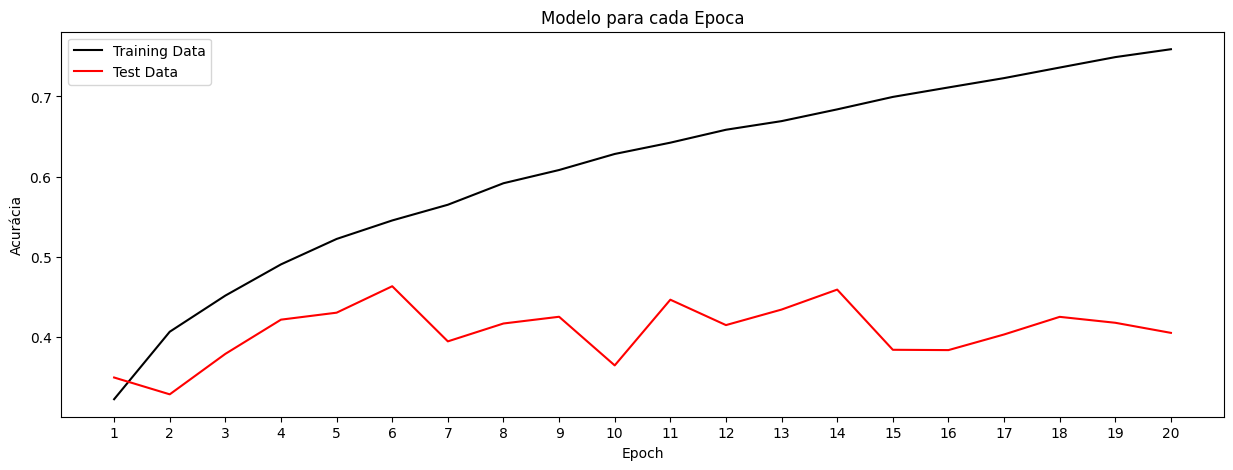

In [ ]:
# Plotar
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.title(label='Modelo para cada Epoca', loc='center')

ax.plot(r2.history['accuracy'], label='Training Data', color='black')
ax.plot(r2.history['val_accuracy'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Acurácia')
plt.xticks(ticks=np.arange(len(r2.history['accuracy'])), labels=np.arange(1, len(r2.history['accuracy'])+1))
plt.legend()
plt.show()

Neste modelo podemos observar que tem overfitting

In [ ]:
# Para reconstruir a imagem original e verificar somente a perda "loss" ou seja compara o train normal e com estática

#Compilando modelo
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

iter=20
r3 = model2.fit(x_train_noisy, x_train, epochs=iter, batch_size=32, verbose=1, validation_data=(x_test_noisy, x_test))

Epoch 1/20
1563/1563 [==============================] - 25s 12ms/step - loss: 0.0505 - val_loss: 0.0390
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0244 - val_loss: 0.0231
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0167 - val_loss: 0.0223
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0113 - val_loss: 0.0116
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0075 - val_loss: 0.0096
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0067 - val_loss: 0.0094
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 10/20
1563/1563 [==============================] - 17s 11m

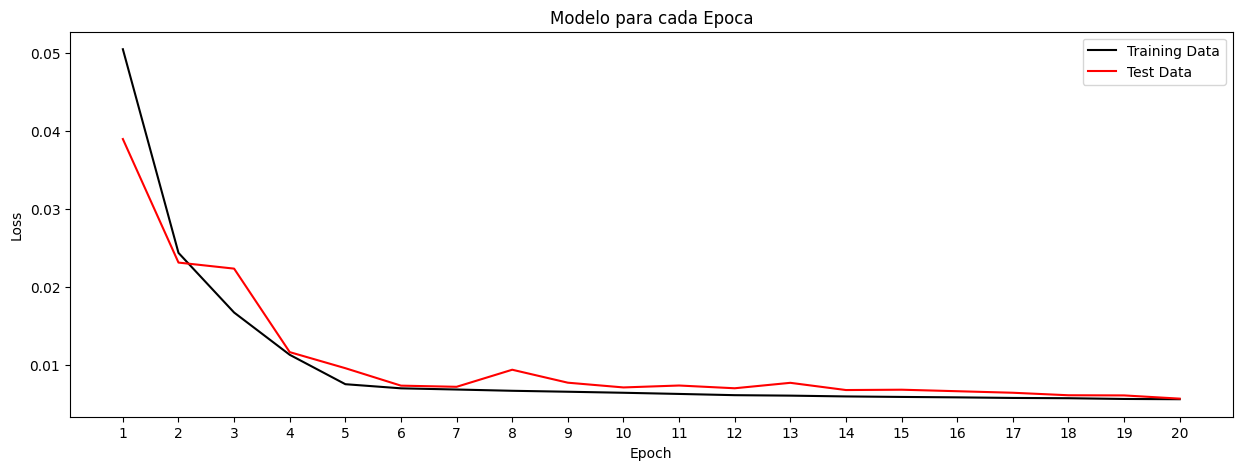

In [ ]:
# Plotar
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.title(label='Modelo para cada Epoca', loc='center')

ax.plot(r3.history['loss'], label='Training Data', color='black')
ax.plot(r3.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(r3.history['loss'])), labels=np.arange(1, len(r3.history['loss'])+1))
plt.legend()
plt.show()

Mostrei as figuras na base, com estática e a predição depois do denoising.

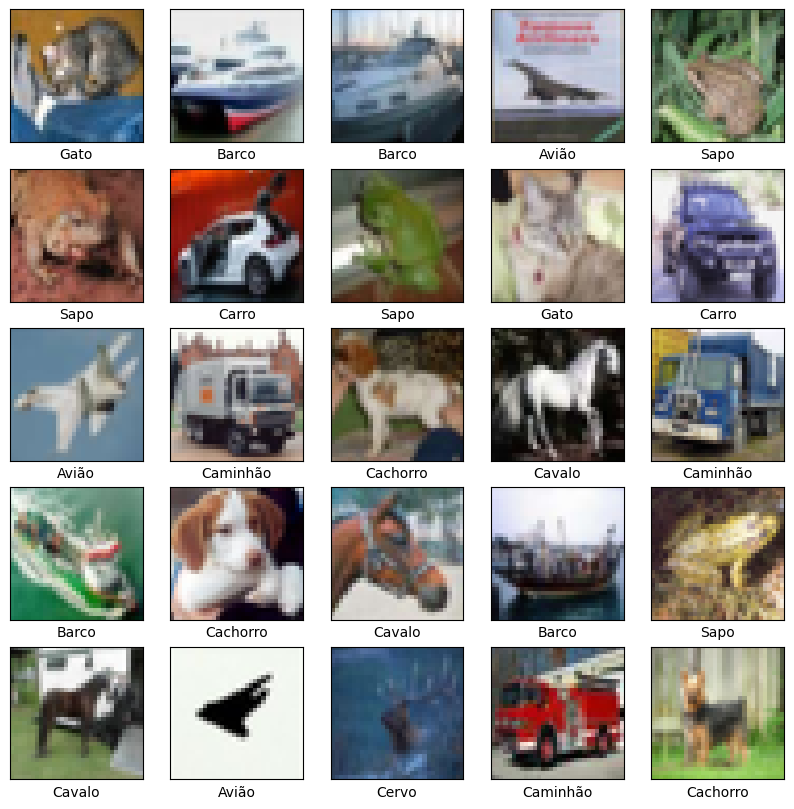

In [ ]:
# Figura Base
x_test_back = x_test.reshape(10000, 32, 32,3)
visualiza(x_test_back,test_labels)

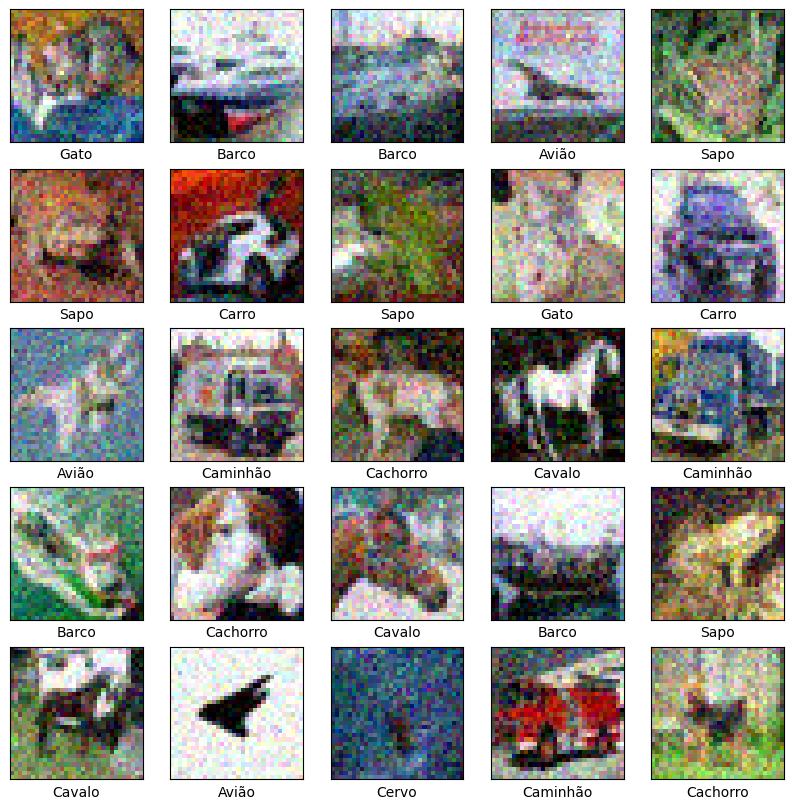

In [ ]:
# Estática
x_test_noisy_reshaped = x_test_noisy.reshape(10000, 32, 32,3)
visualiza(x_test_noisy_reshaped,test_labels)

313/313 [==============================] - 28s 89ms/step


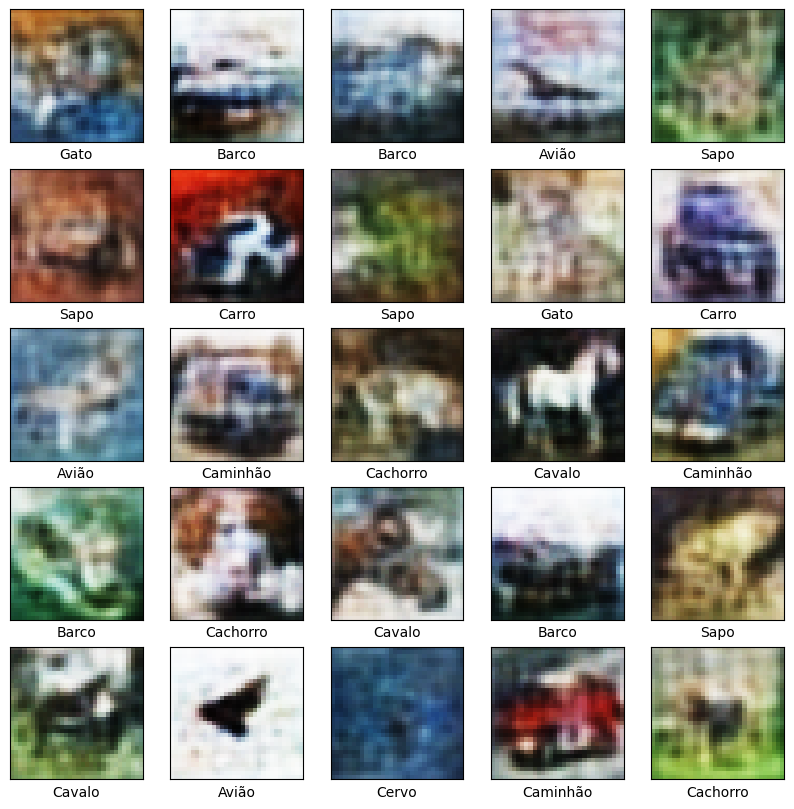

In [ ]:
# Aplicando o modelo com estática e reproduzindo
x_test_denoised = model2.predict(x_test_noisy).reshape(10000, 32, 32,3)
visualiza(x_test_denoised,test_labels)

Resultados

Testar modelo novo com estática

1/1 [==============================] - 0s 27ms/step


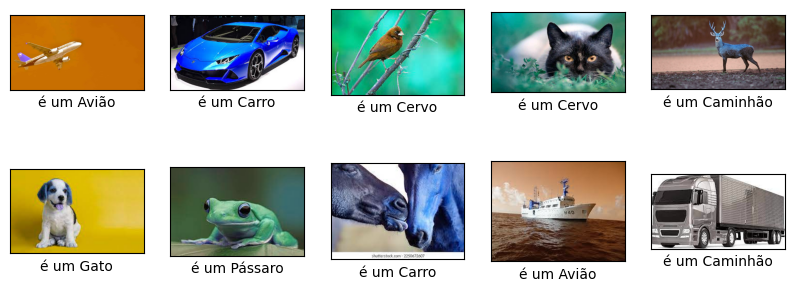

In [ ]:
Teste=['teste0.jpg','teste1.jpg','teste2.jpg','teste3.jpg','teste4.jpg','teste5.jpg','teste6.jpg','teste7.jpg','teste8.jpg','teste9.jpg']
num = len(Teste)
labels = '''Avião Carro Pássaro Gato Cervo Cachorro Sapo Cavalo Barco Caminhão'''.split()
i=0
plt.figure(figsize=(10,10))
for i in range(num):
  imagem = cv2.resize(cv2.imread(Teste[i]), (32, 32), interpolation = cv2.INTER_NEAREST)/255
  # imagem teste externa
  n = np.array(imagem)
  p = n.reshape(1, 3072) #reorganização da matriz da foto
  predicted_label = labels[model2.predict(p).argmax()] #modelo para etiquetar na clase
  #Mostrando o resultado

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.imread(Teste[i]))
  plt.xlabel("é um {}".format(predicted_label))
plt.show()

Com o novo modelo podemos ver que a acurácia deu mais baixa.

In [ ]:
# Salvando o modelo
model.save('Trabalhomodelofinal.h5')

##**Conclusões**

* Segundo os valores do relatorio muito próximos de acurácia, não houve overfitting e foi válida a utilização de melhorias no batch e no passo;
* Utilizamos recursos de melhoria dos modelos, porém após avaliação dos resultados, denoising encoder, melhorando a entrada de dados, porém testando dois modelos não viemos muito sucesso e apareceu overfitting;
* Interessante melhoria dos dados com um bom pré processamento;
* Finalmente nosso índice de resultados foi muito bom, evidenciado com as fotos de alta qualidade, ainda tendo o problema da diferença da base de dados serem fotos de baixa qualidade, o modelo se comporto bem;
* Precisamos ter cuidado com os valores do noise, com o modelo gerado com neurónios, pois quando colocamos um número absurdo o resultado tende a piorar;
* Preciamos tambem ter cuidado com as épocas, porque dependendendo do programa que estamos utilizando da problema;
* Cuidado com as resoluções das fotos, pois se temos uma base com fotos muito ruins, o modelo não consegue identificar fotos de grande resolução;
* Devemos ter cuidado com a programação, pois se não temos uma boa organização da lógica de programação, podemos obter resultados falsos.

##**Check list**

Objetivo: Feito.

Descrição do problema? - Feito.

Preparação de Dados (validação, padronização, fetures selection)- Feito.

Modelagem e treinamento (escolha do modelo, hiperparâmetros, ensembles) - Feito - parcialmente, foi decidido melhorar o batch e os passos.

Avaliação de Resultados:- Resultados, comparação dos modelos e método fazem sentido - Feito.

Foi observado algum problema de overfitting - Feito.

Descreva a melhor solução encontrada - Feito.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------